In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
adata = sc.datasets.pbmc3k() ## load data

In [3]:
sc.pp.calculate_qc_metrics(adata, inplace=True) ## compute quality control metrics

Trying to set attribute `.obs` of view, making a copy.


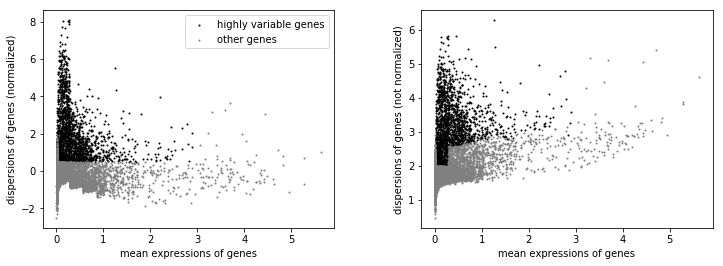

In [4]:
## Just reimplement the normalization and preprocessing 
## described in the scanpy tutorial here: 
## https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata.obs['n_counts'] = adata.X.sum(axis=1).A1
adata = adata[adata.obs['n_genes'] < 2500, :]
adata = adata[adata.obs['percent_mito'] < 0.05, :]
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata = adata[:, adata.var['highly_variable']]
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])
sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [5]:
sc.tl.umap(adata) ## compute embeddings
sc.tl.tsne(adata)
sc.tl.draw_graph(adata, layout='fr')

In [7]:
sc.tl.louvain(adata) ## compute clusters
sc.tl.leiden(adata)

In [8]:
adata.write('./pbmc3k_reprocessed.h5ad')